In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests as r

## Munging Data

In [2]:
df = pd.read_csv('my-ava-raw.csv')

In [3]:
df.dtypes

Unnamed: 0                           int64
Accident and Rescue Summary:        object
Aspect:                             object
Avalanche Problem:                  object
Avalanche Type:                     object
Buried - Fully:                    float64
Buried - Partly:                   float64
Carried:                           float64
Caught:                            float64
Comments:                           object
Coordinates:                        object
Depth:                              object
Elevation:                          object
Injured:                           float64
Killed:                              int64
Location Name or Route:             object
Observation Date:                   object
Observer Name:                      object
Occurence Time:                     object
Occurrence Date:                    object
Region:                             object
Slope Angle:                       float64
Snow Profile Comments:              object
Terrain Sum

In [4]:
df.describe()

,Unnamed: 0,Buried - Fully:,Buried - Partly:,Carried:,Caught:,Injured:,Killed:,Slope Angle:,Video:,killed
count,98.000000,69.000000,25.0,77.000000,78.000000,7.000000,98.000000,43.000000,0.0,98.000000
mean,48.500000,1.173913,1.2,1.649351,1.692308,1.142857,1.183673,37.906977,NaN,1.183673
std,28.434134,0.418559,0.5,1.144394,1.176697,0.377964,0.504555,5.558408,NaN,0.504555
min,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,1.000000
25%,24.250000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,36.000000,NaN,1.000000
50%,48.500000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,38.000000,NaN,1.000000
75%,72.750000,1.000000,1.0,2.000000,2.000000,1.000000,1.000000,40.000000,NaN,1.000000
max,97.000000,3.000000,3.0,7.000000,7.000000,2.000000,4.000000,50.000000,NaN,4.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'Accident and Rescue Summary:', 'Aspect:',
       'Avalanche Problem:', 'Avalanche Type:', 'Buried - Fully:',
       'Buried - Partly:', 'Carried:', 'Caught:', 'Comments:', 'Coordinates:',
       'Depth:', 'Elevation:', 'Injured:', 'Killed:',
       'Location Name or Route:', 'Observation Date:', 'Observer Name:',
       'Occurence Time:', 'Occurrence Date:', 'Region:', 'Slope Angle:',
       'Snow Profile Comments:', 'Terrain Summary:', 'Trigger:',
       'Trigger: additional info:', 'Vertical:', 'Video:', 'Weak Layer:',
       'Weather Conditions and History:', 'Width:', 'coordinates', 'killed',
       'occurrence-date', 'region-forecaster', 'region-forecaster-1',
       'trigger', 'url'],
      dtype='object')

In [6]:
df = df.rename(columns={x:x.replace(':', '') for x in df.columns})

In [7]:
df.Aspect.value_counts()

Northeast    25
North        14
Northwest    10
East          9
Southeast     3
West          3
South         2
Southwest     1
Name: Aspect, dtype: int64

In [8]:
df['Avalanche Problem'].value_counts()

Persistent Slab    15
Deep Slab           3
Wind Slab           3
Storm Slab          3
Wet Slab            2
Glide               1
Name: Avalanche Problem, dtype: int64

In [9]:
df['Avalanche Type'].value_counts()

Hard Slab       27
Soft Slab       26
Cornice Fall     1
Wet Slab         1
Name: Avalanche Type, dtype: int64

In [10]:
df.Depth

0       3'
1      18"
2     2.5'
3       4'
4       4'
5      18"
6       8"
7       2'
8       3'
9       2'
10     16"
11      3'
12    2.5'
13     16"
14     NaN
15    3.5'
16      8'
17    3.5'
18      3'
19      2'
20      4'
21    4.5'
22     12"
23    4.5'
24    3.5'
25    3.5'
26     20"
27    2.5'
28      3'
29      3'
      ... 
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74      3'
75     NaN
76      5'
77      4'
78      2'
79    3.5'
80      2'
81      2'
82      2'
83      2'
84     18"
85    3.5'
86    2.5'
87      2'
88      3'
89      4'
90      2'
91      3'
92      3'
93     NaN
94      4"
95     NaN
96      3'
97     NaN
Name: Depth, Length: 98, dtype: object

In [11]:
import re

def to_inches(orig):
    reg = r"""(((\d*\.)?\d*)')?(((\d*\.)?\d*)")?"""
    txt = str(orig)
    if txt == 'nan':
        return orig
    mo = re.search(reg, txt)
    feet = mo.group(2) or 0
    inches = mo.group(5) or 0
    return float(feet)*12 + float(inches)

to_inches('18"'), to_inches("2.5'")

(18.0, 30.0)

In [12]:
df['depth_inches'] = df.Depth.apply(to_inches)

In [13]:
df.depth_inches

0     36.0
1     18.0
2     30.0
3     48.0
4     48.0
5     18.0
6      8.0
7     24.0
8     36.0
9     24.0
10    16.0
11    36.0
12    30.0
13    16.0
14     NaN
15    42.0
16    96.0
17    42.0
18    36.0
19    24.0
20    48.0
21    54.0
22    12.0
23    54.0
24    42.0
25    42.0
26    20.0
27    30.0
28    36.0
29    36.0
      ... 
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74    36.0
75     NaN
76    60.0
77    48.0
78    24.0
79    42.0
80    24.0
81    24.0
82    24.0
83    24.0
84    18.0
85    42.0
86    30.0
87    24.0
88    36.0
89    48.0
90    24.0
91    36.0
92    36.0
93     NaN
94     4.0
95     NaN
96    36.0
97     NaN
Name: depth_inches, Length: 98, dtype: float64

In [14]:
df.depth_inches.describe()

count    63.000000
mean     32.301587
std      17.440808
min       0.000000
25%      24.000000
50%      30.000000
75%      42.000000
max      96.000000
Name: depth_inches, dtype: float64

## More munging

In [15]:
df['Occurrence Date']

0         Sunday, January 31, 2016
1       Thursday, January 21, 2016
2         Wednesday, March 4, 2015
3            Friday, March 7, 2014
4         Sunday, February 9, 2014
5       Saturday, February 8, 2014
6         Thursday, April 11, 2013
7            Friday, March 1, 2013
8         Friday, January 18, 2013
9          Saturday, March 3, 2012
10     Thursday, February 23, 2012
11        Sunday, February 5, 2012
12      Saturday, January 28, 2012
13       Sunday, November 13, 2011
14        Saturday, March 26, 2011
15       Friday, November 26, 2010
16           Sunday, April 4, 2010
17        Friday, January 29, 2010
18     Wednesday, January 27, 2010
19        Sunday, January 24, 2010
20      Tuesday, December 30, 2008
21    Wednesday, December 24, 2008
22       Sunday, December 14, 2008
23       Monday, December 31, 2007
24      Tuesday, December 25, 2007
25       Sunday, December 23, 2007
26    Wednesday, February 21, 2007
27       Sunday, February 18, 2007
28     Saturday, Feb

In [16]:
pd.to_datetime(df['Occurrence Date'])

0    2016-01-31
1    2016-01-21
2    2015-03-04
3    2014-03-07
4    2014-02-09
5    2014-02-08
6    2013-04-11
7    2013-03-01
8    2013-01-18
9    2012-03-03
10   2012-02-23
11   2012-02-05
12   2012-01-28
13   2011-11-13
14   2011-03-26
15   2010-11-26
16   2010-04-04
17   2010-01-29
18   2010-01-27
19   2010-01-24
20   2008-12-30
21   2008-12-24
22   2008-12-14
23   2007-12-31
24   2007-12-25
25   2007-12-23
26   2007-02-21
27   2007-02-18
28   2007-02-17
29   2007-02-17
        ...    
68   1993-04-03
69   1993-02-25
70   1993-01-16
71   1992-04-01
72   1992-02-12
73   1989-11-25
74   1987-02-15
75   1986-11-20
76   1986-02-19
77   1986-02-17
78   1986-01-06
79   1985-11-13
80   1985-03-19
81   1985-02-22
82   1984-01-02
83   1982-03-22
84   1981-03-01
85   1981-02-01
86   1980-01-11
87   1979-04-02
88   1979-01-19
89   1977-03-03
90   1976-01-06
91   1973-12-29
92   1970-01-20
93   1968-02-19
94   1967-02-12
95   1965-12-31
96   1964-03-29
97   1958-03-09
Name: Occurrence Date, L

In [17]:
df['year'] = pd.to_datetime(df['Occurrence Date']).dt.year

In [18]:
df['dow'] = df['Occurrence Date'].apply(lambda x: x.split(',')[0])

In [19]:
df.dow.value_counts()

Saturday     29
Sunday       16
Friday       15
Thursday     12
Monday       10
Wednesday    10
Tuesday       6
Name: dow, dtype: int64

In [20]:
df.Vertical

0         300
1        1250
2        1500
3         200
4         175
5         125
6        1500
7         250
8          50
9        1000
10        600
11        350
12       2500
13        800
14        900
15    Unknown
16       1000
17       1000
18        600
19       1500
20        500
21        700
22       1000
23        450
24        400
25        600
26        600
27       1500
28        250
29        250
       ...   
68        NaN
69        NaN
70        NaN
71        NaN
72        NaN
73        NaN
74        500
75        NaN
76       1000
77        350
78        700
79        600
80        NaN
81        400
82       1500
83        500
84        700
85        100
86        200
87        600
88        250
89        500
90        100
91        300
92        300
93        NaN
94       1500
95        300
96       1250
97       1250
Name: Vertical, Length: 98, dtype: object

In [21]:
df['vert'] = df.Vertical.str.replace('Unknown', 'NaN').astype(float)
df['vert'] = df.vert.fillna(df.vert.median())

In [22]:
df.vert.describe()

count      98.000000
mean      653.061224
std       375.545399
min        50.000000
25%       500.000000
50%       600.000000
75%       600.000000
max      2500.000000
Name: vert, dtype: float64

In [23]:
df.coordinates

0     40.681035109898, -111.598269411350
1     40.666951474815, -111.685399884810
2     41.215552643517, -111.873779284110
3     40.812120000000, -110.906296000000
4     39.585986000000, -111.270003000000
5     40.482366000000, -111.648088000000
6     40.629000000000, -111.666412000000
7     39.043600000000, -111.519000000000
8                                    NaN
9     38.539320000000, -109.209852000000
10    40.653034000000, -111.592255000000
11    38.716456000000, -111.721988000000
12    40.624442000000, -111.669588000000
13    40.568491000000, -111.652937000000
14    39.372824000000, -111.422482000000
15    40.847320000000, -111.015129000000
16    41.050424000000, -111.844082000000
17    40.856199868806, -111.754991041400
18    40.617112000000, -111.623840000000
19    41.215563000000, -111.873307000000
20    40.871988000000, -110.974016000000
21    41.711752000000, -111.717181000000
22    40.569632000000, -111.641693000000
23        0.000000000000, 0.000000000000
24    40.8348200

In [24]:
def lon(val):
    if str(val) == 'nan':
        return float('nan')
    else:
        return float(val.split(',')[-1])

df['lon'] = df.coordinates.apply(lon)

In [25]:
df.lon.describe()

count     82.000000
mean    -110.196626
std       12.324395
min     -112.023039
25%     -111.684457
50%     -111.616567
75%     -111.534519
max        0.000000
Name: lon, dtype: float64

In [26]:
df['lat'] = df.coordinates.apply(lambda x: float(x.split(',')[0]) if str(x) != 'nan' else float('nan'))

In [27]:
df.lat.describe()

count    82.000000
mean     40.016124
std       4.514445
min       0.000000
25%      40.422754
50%      40.606194
75%      40.678187
max      41.711752
Name: lat, dtype: float64

## Plotting Data

In [28]:
df.dtypes

Unnamed 0                           int64
Accident and Rescue Summary        object
Aspect                             object
Avalanche Problem                  object
Avalanche Type                     object
Buried - Fully                    float64
Buried - Partly                   float64
Carried                           float64
Caught                            float64
Comments                           object
Coordinates                        object
Depth                              object
Elevation                          object
Injured                           float64
Killed                              int64
Location Name or Route             object
Observation Date                   object
Observer Name                      object
Occurence Time                     object
Occurrence Date                    object
Region                             object
Slope Angle                       float64
Snow Profile Comments              object
Terrain Summary                   

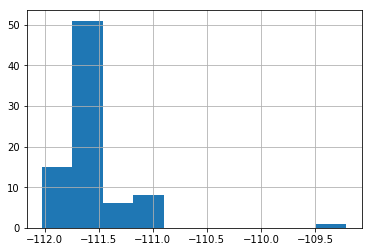

In [29]:
%matplotlib inline
df[df.lon < 0].lon.hist()

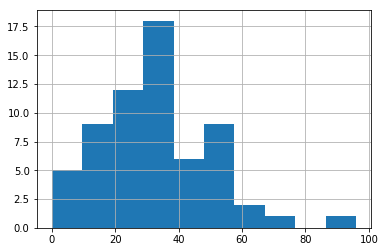

In [30]:
df.depth_inches.hist()

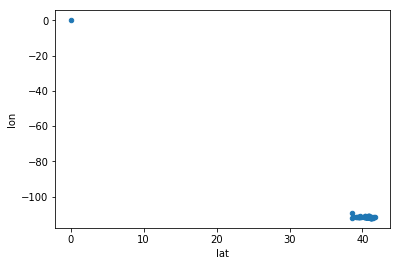

In [31]:
df.plot.scatter('lat', 'lon')

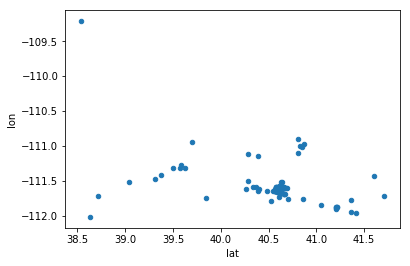

In [32]:
df[df.lat > 0].plot.scatter('lat', 'lon')

In [33]:
import gmaps # pip install gmaps

In [34]:
gmaps.heatmap([x for x in zip(df.lat, df.lon)])

TypeError: 'module' object is not callable

In [ ]:
gmaps.heatmap([x for x in zip(df.lat, df.lon) if str(x[0]) != 'nan'])

In [ ]:
gmaps.heatmap([x for x in zip(df.lat, df.lon) if str(x[0]) != 'nan'],
             max_intensity=1)

In [ ]:
import folium # pip install folium
from IPython.display import HTML

In [ ]:
def inline_map(map):
    map._build_map()
    return HTML('<iframe srcdoc="{}" style="width:100%; height: 500px;"></iframe>'.format(
        map.HTML.replace('"', '&quot;')))

def summary(i, row):
    return '''<b>{} {} {} {}</b
    <p>{}</p>'''.format(i, row['year'], row['Trigger'], row['Location Name or Route'],
                       row['Accident and Rescue Summary'])

center = [40.5, -111.5]
map = folium.Map(location=center, zoom_start=10, tiles='Stamen Terrain', height=700)
for i, row in df.iterrows():
    if str(row.lat) == 'nan' or row.lat == 0:
        continue
    map.simple_marker([row.lat, row.lon], popup=summary(i, row))

inline_map(map)


## Infographic

![title](img/ava2.png)

![title](img/ava-deaths.png)

In [37]:
import seaborn as sns
df2 = df.groupby('year').sum().reset_index()[['year', 'killed']]
df2

,year,killed
0,1958,1
1,1964,1
2,1965,1
3,1967,2
4,1968,1
5,1970,1
6,1973,1
7,1976,1
8,1977,1
9,1979,2


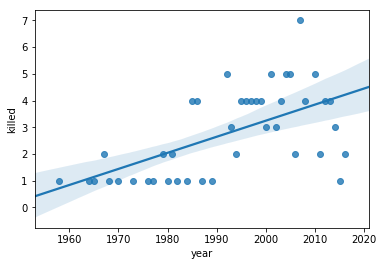

In [38]:
sns.regplot(x='year', y='killed', data=df2)

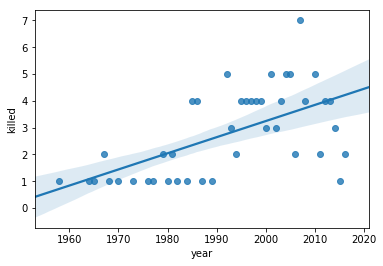

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = sns.regplot(x='year', y='killed', data=df2)
fig.savefig('scat.svg')

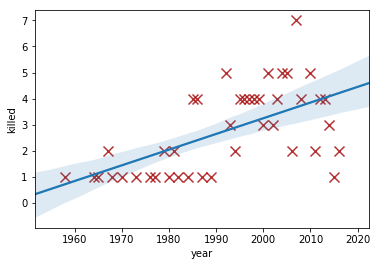

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = sns.regplot(x='year', y='killed', data=df2,
                marker='x', scatter_kws={'s':100, 'color': '#a40000'})
fig.savefig('/tmp/scat.svg')

![title](img/ava-map.png)

![title](img/ava-triggers.png)

In [41]:
df.Trigger.value_counts()

Skier          43
Snowmobiler    25
Snowboarder    13
Natural         7
Hiker           4
Unknown         3
Snowshoer       2
Name: Trigger, dtype: int64

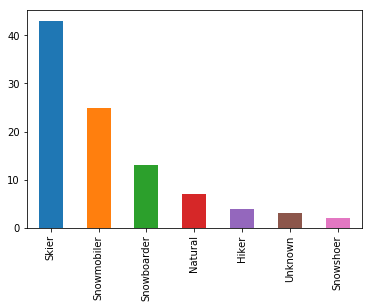

In [42]:
df.Trigger.value_counts().plot.bar()

![title](img/ava-elevation.png)

In [ ]:
df.Elevation

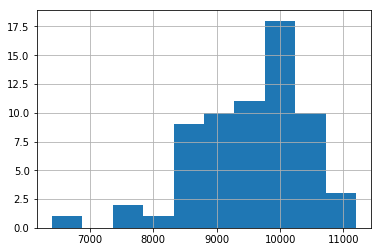

In [43]:
df.Elevation.str.replace('Unknown', 'NaN').astype('float').hist()

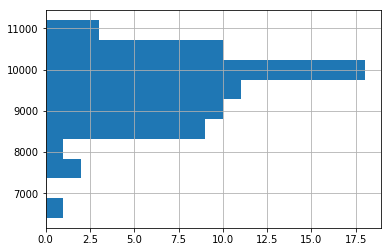

In [44]:
df.Elevation.str.replace('Unknown', 'NaN').astype('float').hist(
  orientation='horizontal')

![title](img/ava-slope.png)

(0, 1)

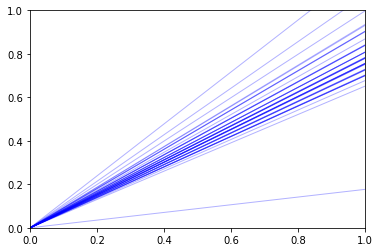

In [45]:
import math
import random

def to_rad(d):
    return d * math.pi/180

ax = plt.subplot(111)
for i, row in df.iterrows():
    jitter = (random.random() - .5 )*.2
    plt.plot([0,1], [0, math.tan(to_rad(row['Slope Angle'] + jitter))],
            alpha=.3, color='b', linewidth=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

![title](img/ava-aspects.png)

In [46]:
df.Aspect.value_counts()

Northeast    25
North        14
Northwest    10
East          9
Southeast     3
West          3
South         2
Southwest     1
Name: Aspect, dtype: int64

[('Northeast', 25), ('North', 14), ('Northwest', 10), ('East', 9), ('Southeast', 3), ('West', 3), ('South', 2), ('Southwest', 1)]


[('Northeast', 25),
 ('North', 14),
 ('Northwest', 10),
 ('East', 9),
 ('Southeast', 3),
 ('West', 3),
 ('South', 2),
 ('Southwest', 1)]

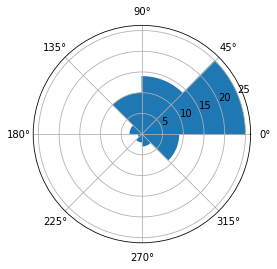

In [59]:
mapping = {'North':90, 'Northeast': 45, 'East': 0, 'Southeast': 315, 'South':270,
          'Southwest':225, 'West': 180, 'Northwest':135}

items = list(df.Aspect.value_counts().items())
print(items)
ax = plt.subplot(111, projection='polar')
thetas = [to_rad(mapping[x[0]] - 22.5) for x in items]
radii = [x[1] for x in items]
bars = ax.bar(thetas, radii)

items

In [50]:
list(df.Aspect.value_counts().items())

[('Northeast', 25),
 ('North', 14),
 ('Northwest', 10),
 ('East', 9),
 ('Southeast', 3),
 ('West', 3),
 ('South', 2),
 ('Southwest', 1)]

In [55]:
thetas = [x[0] for x in items]
thetas

['Northeast',
 'North',
 'Northwest',
 'East',
 'Southeast',
 'West',
 'South',
 'Southwest']